___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load Dataset

In [3]:
df = pd.read_csv("https://github.com/PatrickJWalsh/Mall-Customer-Segmentation/blob/master/Mall%20Customers.csv?raw=true", index_col=0)

#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
# Rename columns

df.columns = ['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']

In [ ]:
df.head()

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.isnull().sum()

gender                   0
age                      0
annual_income(k$)        0
spending_score(1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,annual_income(k$),spending_score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


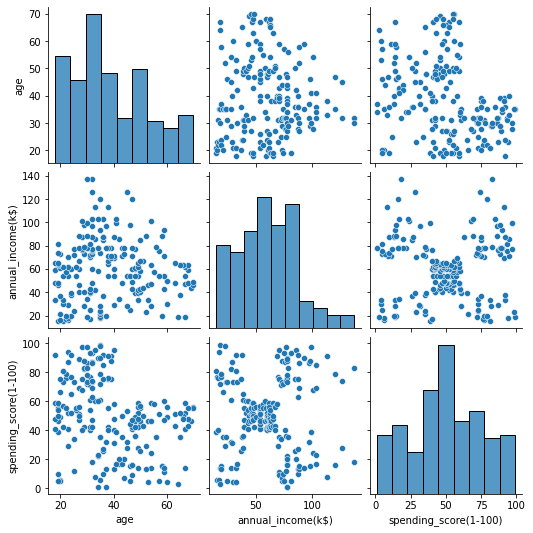

In [9]:
sns.pairplot(df);

In [ ]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

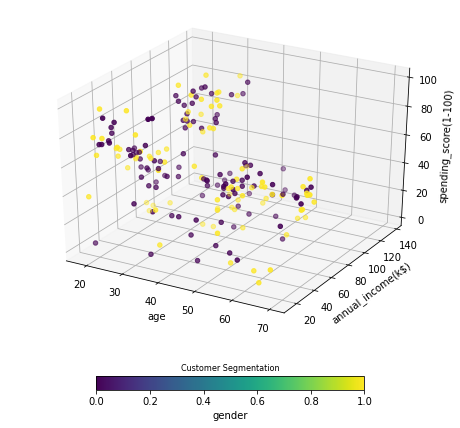

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['gender'].astype("category").cat.codes, cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

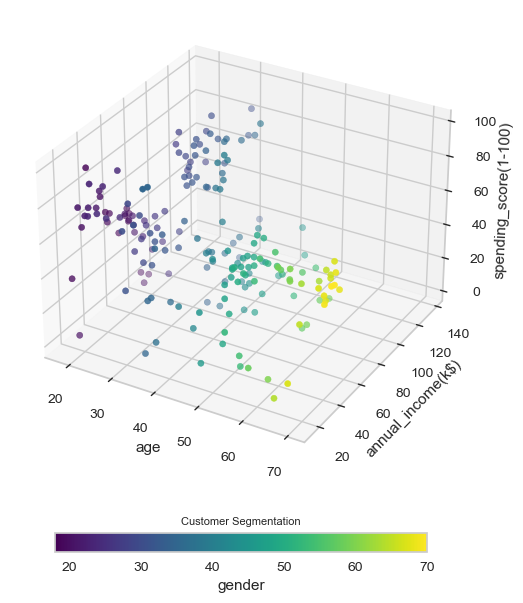

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

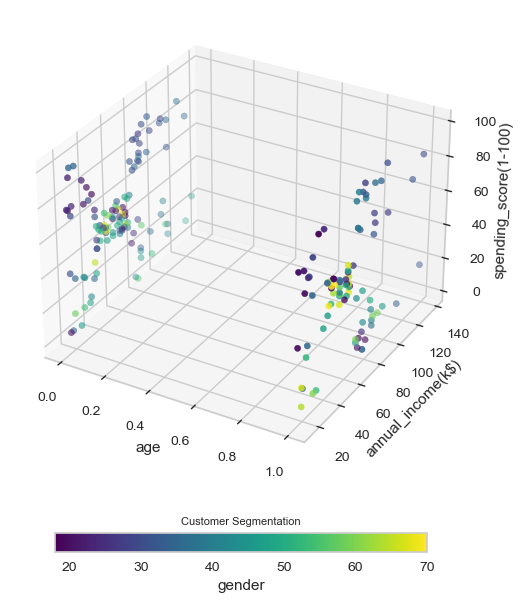

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

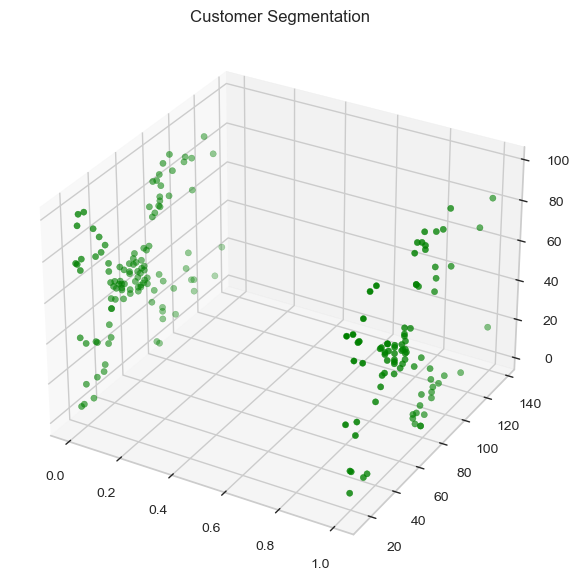

In [ ]:
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], color = "green")
plt.title("Customer Segmentation")
 
# show plot
plt.show()

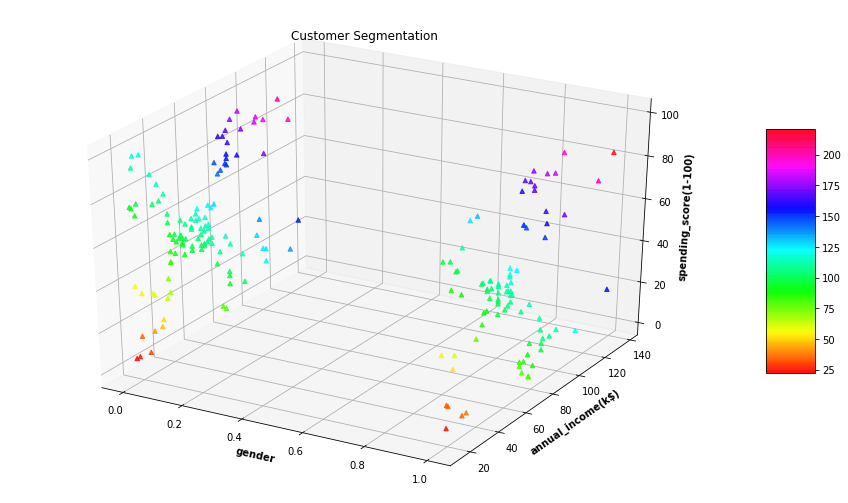

In [11]:
# Import libraries
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'],
                    alpha = 0.8,
                    c = (df['gender'].astype("category").cat.codes + df['annual_income(k$)'] + df['spending_score(1-100)']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('gender', fontweight ='bold')
ax.set_ylabel('annual_income(k$)', fontweight ='bold')
ax.set_zlabel('spending_score(1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

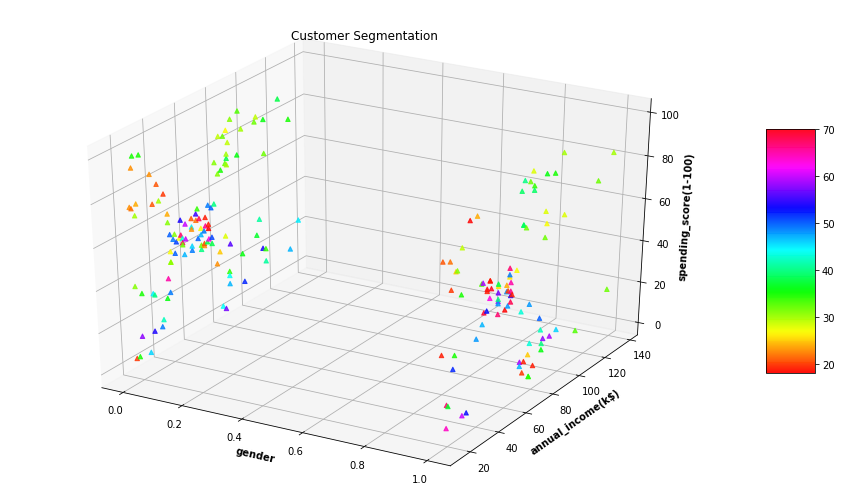

In [12]:
# Import libraries
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'],
                    alpha = 0.8,
                    c = (df['age']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('gender', fontweight ='bold')
ax.set_ylabel('annual_income(k$)', fontweight ='bold')
ax.set_zlabel('spending_score(1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

In [13]:
df.corr()

,age,annual_income(k$),spending_score(1-100)
age,1.000000,-0.012398,-0.327227
annual_income(k$),-0.012398,1.000000,0.009903
spending_score(1-100),-0.327227,0.009903,1.000000


---
---

In [14]:
df.groupby("gender").describe().T

gender                           Female        Male
age                   count  112.000000   88.000000
                      mean    38.098214   39.806818
                      std     12.644095   15.514812
                      min     18.000000   18.000000
                      25%     29.000000   27.750000
                      50%     35.000000   37.000000
                      75%     47.500000   50.500000
                      max     68.000000   70.000000
annual_income(k$)     count  112.000000   88.000000
                      mean    59.250000   62.227273
                      std     26.011952   26.638373
                      min     16.000000   15.000000
                      25%     39.750000   45.500000
                      50%     60.000000   62.500000
                      75%     77.250000   78.000000
                      max    126.000000  137.000000
spending_score(1-100) count  112.000000   88.000000
                      mean    51.526786   48.511364
                      std     24.114950   27.896770
                      min      5.000000    1.000000
                      25%     35.000000   24.500000
                      50%     50.000000   50.000000
                      75%     73.000000   70.000000
                      max     99.000000   97.000000

In [15]:
df.groupby("gender").corr()

age  annual_income(k$)  \
gender                                                      
Female age                    1.000000           0.059912   
       annual_income(k$)      0.059912           1.000000   
       spending_score(1-100) -0.375439           0.047542   
Male   age                    1.000000          -0.092978   
       annual_income(k$)     -0.092978           1.000000   
       spending_score(1-100) -0.279628          -0.023684   

                              spending_score(1-100)  
gender                                               
Female age                                -0.375439  
       annual_income(k$)                   0.047542  
       spending_score(1-100)               1.000000  
Male   age                                -0.279628  
       annual_income(k$)                  -0.023684  
       spending_score(1-100)               1.000000

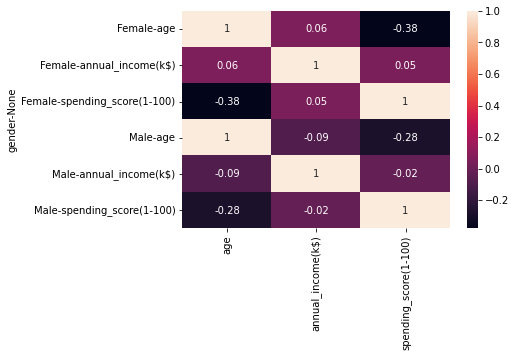

In [16]:
sns.heatmap(df.groupby("gender").corr().round(2), annot=True);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [17]:
df["gender"] =df.gender.map({"Male":1, "Female":0})

In [18]:
df1 = df.copy()

In [19]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [20]:
X =df_scaled[:, [1,3]]
X

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

#### *ii. Determine optimal number of clusters*

In [21]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [ ]:
# with pipeline

In [22]:
from sklearn.pipeline import Pipeline

operations = [("scaler", scaler),("kmeans_model", KMeans(n_clusters=5, random_state=42))]
pipe_model = Pipeline(operations)

In [23]:
X =df.iloc[:, [1,3]]
X

,age,spending_score(1-100)
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40
...,...,...
196,35,79
197,45,28
198,32,74


In [24]:
pipe_model.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

### Hopkins method

In [ ]:
from pyclustertend import hopkins

In [ ]:
X.shape

In [ ]:
hopkins(X, X.shape[0])

In [ ]:
hopkins(X, 50)

In [25]:
# Elbow method using age and sending score variabels

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

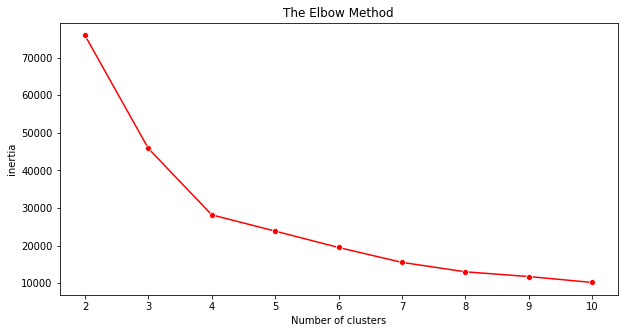

In [26]:
# Elbow method using age and sending score variabels

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [27]:
pd.Series(inertia).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
8    -1564.980819
dtype: float64

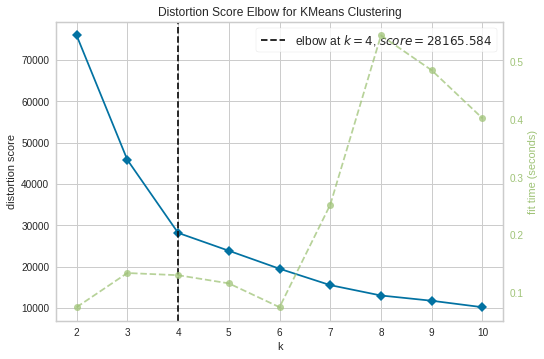

In [28]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [29]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [30]:
silhouette_score(X, kmeans.labels_)  # cluster sayısı 4 için

0.49973941540141753

In [31]:
# silhouette_scores for different k values

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


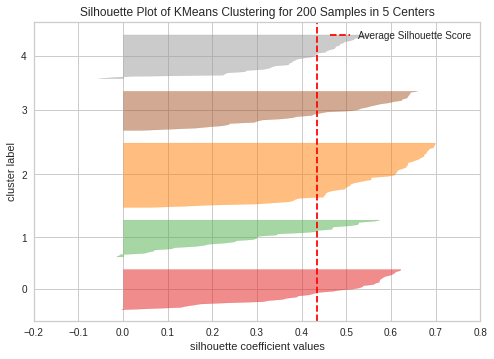

In [32]:
# cluster 5 için
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

In [33]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('age')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

TypeError: ignored

<Figure size 1080x504 with 0 Axes>

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

In [ ]:
X =df_scaled[:, [2,3]]
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### *ii. Determine optimal number of clusters*

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Hopkins method

In [ ]:
X.shape

(200, 2)

In [ ]:
hopkins(X, X.shape[0])

0.28677923949851614

In [ ]:
hopkins(X, 50)

0.3216675513419187

In [ ]:
# Elbow method using age and sending score variabels

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

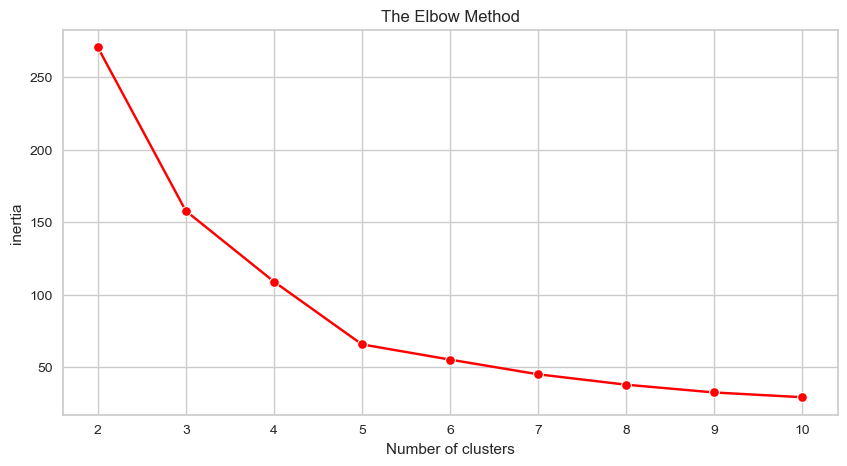

In [ ]:
# Elbow method using age and sending score variabels

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
pd.Series(inertia).diff()

0           NaN
1   -113.000258
2    -48.782692
3    -43.352908
4    -10.511060
5    -10.146163
6     -7.174782
7     -5.361150
8     -3.284685
dtype: float64

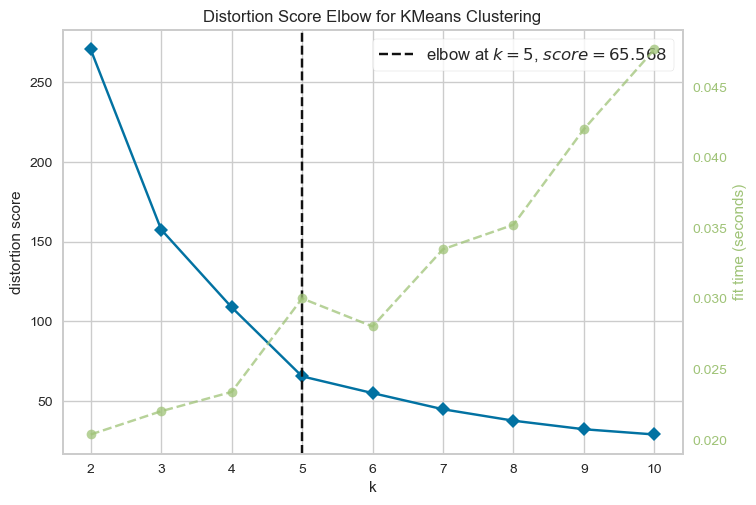

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### *iii. Apply K Means*

In [ ]:
from sklearn.metrics import silhouette_score
kmeans_model = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans_model.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [ ]:
silhouette_score(X, kmeans_model.labels_)  # cluster sayısı 5 için

0.5546571631111091

In [ ]:
# silhouette_scores for different k values

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45584381231187066
For n_clusters=9, the silhouette score is 0.45532159949822104
For n_clusters=10, the silhouette score is 0.4476280825932578


#### *iv. Visualizing and Labeling All the Clusters*

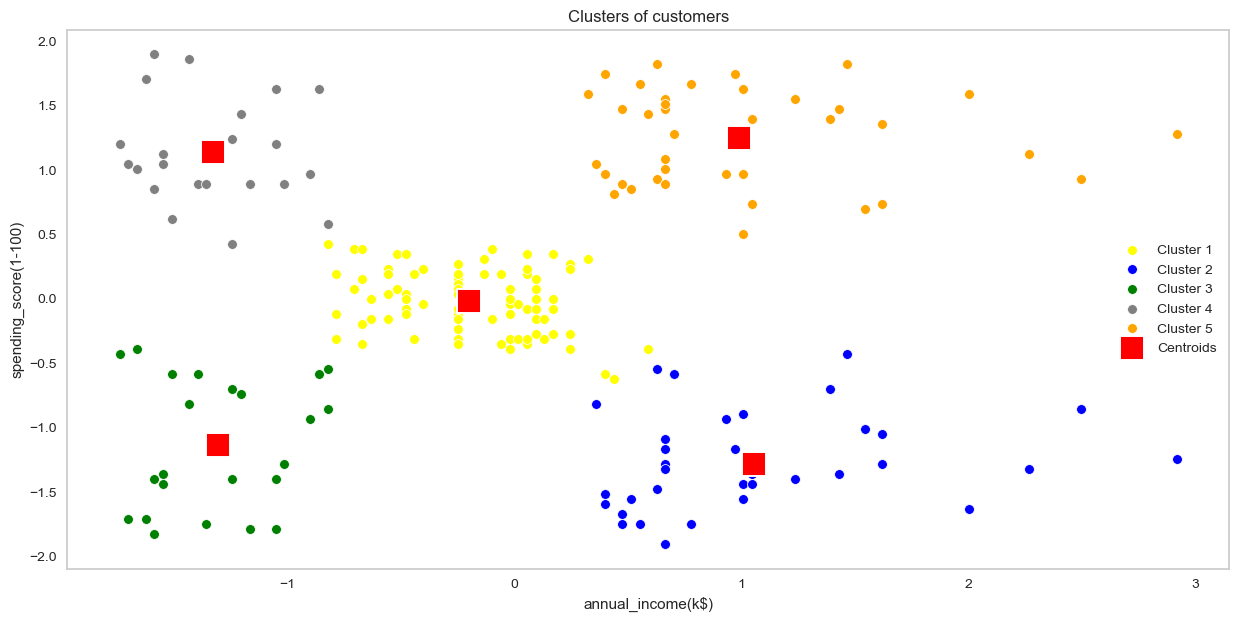

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('annual_income(k$)')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___